<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment2_08_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


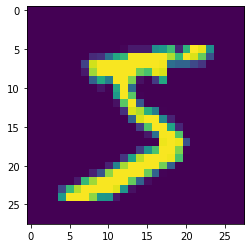

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#Use GAP, BN, LRscheduler, dropout, callbacks
model.add(Convolution2D(10, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), name="FirstConv"))#26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(20, kernel_size=(3, 3), activation='relu'))#24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(30, kernel_size=(3, 3), activation='relu'))#22
model.add(BatchNormalization())
model.add(Dropout(0.01))

model.add(MaxPooling2D(2, 2))#11
model.add(Convolution2D(30, 1, activation='relu'))#11

model.add(Convolution2D(40, kernel_size=(3, 3), activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Convolution2D(50, kernel_size=(3, 3), activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.01))
model.add(Convolution2D(60, kernel_size=(3, 3), activation='relu'))#5
#model.add(Dropout(0.01))

model.add(Convolution2D(10, 5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FirstConv (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 30)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:

snapshot_filepath = "/opt/saved_weight_file.hdf5"
cp_callback = keras.callbacks.ModelCheckpoint(snapshot_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
CALLBACKS = [cp_callback]

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), callbacks = CALLBACKS)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.3168 - acc: 0.9526 - val_loss: 0.0803 - val_acc: 0.9897

Epoch 00001: val_acc improved from -inf to 0.98970, saving model to /opt/saved_weight_file.hdf5
Epoch 2/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.1166 - acc: 0.9792 - val_loss: 0.0475 - val_acc: 0.9913

Epoch 00002: val_acc improved from 0.98970 to 0.99130, saving model to /opt/saved_weight_file.hdf5
Epoch 3/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.0701 - acc: 0.9870 - val_loss: 0.0306 - val_acc: 0.9928

Epoch 00003: val_acc improved from 0.99130 to 0.99280, saving model to /opt/saved_weight_file.hdf5
Epoch 4/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.0505 - acc: 0.9895 - val_loss: 0.0298 - val_acc: 0.9923

Epoch 00004: val_acc did not improve from 0.99280
Epoch 5/20
60000/60000 [======================

In [0]:
model.load_weights(snapshot_filepath)
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.01862877900302992, 0.9952]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.45662317e-07 2.57482100e-07 1.66909985e-07 2.74977396e-07
  4.32914220e-07 1.36480253e-07 3.67409541e-07 9.99997139e-01
  2.95951395e-07 3.76141770e-07]
 [8.08811009e-08 1.15118635e-08 9.99973774e-01 1.74799588e-08
  2.52544601e-06 4.61533006e-07 4.96285611e-06 6.35138917e-07
  1.04402154e-07 1.74652741e-05]
 [1.62998890e-06 9.99960303e-01 2.96980630e-07 4.98723330e-06
  7.14719704e-07 2.74974100e-05 9.76880756e-07 1.88350066e-06
  4.70495905e-07 1.14758870e-06]
 [9.99978185e-01 1.78045832e-06 2.97591555e-07 2.99029216e-06
  5.53960376e-07 6.03631520e-07 3.03726119e-06 4.01906675e-07
  2.05307424e-06 1.00002708e-05]
 [2.09828431e-05 7.37502614e-06 4.17071033e-06 5.38551831e-05
  9.99886870e-01 1.67968676e-06 1.44583555e-05 1.15631588e-06
  8.99011957e-06 3.68736892e-07]
 [1.23784048e-06 9.99963880e-01 2.26622532e-07 3.91329877e-06
  1.20796608e-06 2.45589272e-05 5.52156052e-07 2.85396391e-06
  1.14534498e-06 4.53023148e-07]
 [2.15891774e-07 6.78580932e-07 3.15206847e-08 1.47558538e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

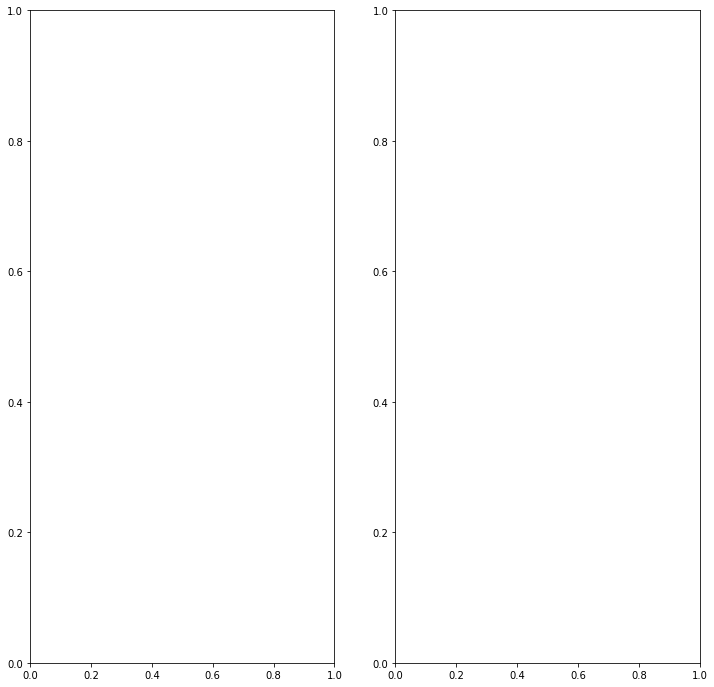

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()